# ***Predicción de Grados Fahrenheit a partir de Grados Celsius Usando Redes Neuronales con TensorFlow***


***Lo primero es importar las librerias necesarias***

In [1]:
import tensorflow as tf
import numpy as np

***Definimos los datos de entrada (grados Celsius) y las salidas (grados Fahrenheit)***

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

print("Datos de entrada (Celsius):", celsius)
print("Datos de salida (Fahrenheit):", fahrenheit)

Datos de entrada (Celsius): [-40. -10.   0.   8.  15.  22.  38.]
Datos de salida (Fahrenheit): [-40.  14.  32.  46.  59.  72. 100.]


***Vamos a construir un modelo con dos capas ocultas y una capa de salida.***

In [5]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])  # Capa oculta 1 con 3 neuronas
oculta2 = tf.keras.layers.Dense(units=3)                   # Capa oculta 2 con 3 neuronas
salida = tf.keras.layers.Dense(units=1)                    # Capa de salida con 1 neurona
# Creación del modelo
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

***Compilamos el modelo***

In [6]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

***Entrenamiento del Modelo***

In [7]:
print("Comenzando el entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando el entrenamiento...
Modelo entrenado!


***Visualización de la Pérdida (Loss)***

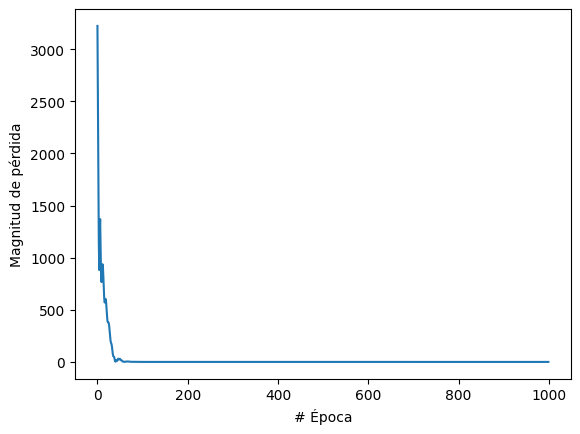

In [8]:
import matplotlib.pyplot as plt

plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
plt.show()

***Vamos a predecir el valor de Fahrenheit para un valor dado en Celsius***

In [10]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100.0]))
print(f"El resultado es {resultado[0][0]:.2f} grados Fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
El resultado es 211.75 grados Fahrenheit!


***Podemos ver los pesos aprendidos por las capas ocultas y la capa de salida.***

In [11]:
print("Variables internas del modelo:")
print("Pesos de la capa oculta 1:")
print(oculta1.get_weights())

print("\nPesos de la capa oculta 2:")
print(oculta2.get_weights())

print("\nPesos de la capa de salida:")
print(salida.get_weights())

Variables internas del modelo:
Pesos de la capa oculta 1:
[array([[-1.0124451 ,  0.44247228,  0.33513746]], dtype=float32), array([-4.0787997, -2.6447778,  4.0318522], dtype=float32)]

Pesos de la capa oculta 2:
[array([[-0.57393456,  0.13532773, -0.8281757 ],
       [-1.1572871 , -0.6236641 , -0.14040023],
       [ 1.5869119 ,  0.07397401,  1.3506559 ]], dtype=float32), array([ 4.0968814, -2.352518 ,  3.8557758], dtype=float32)]

Pesos de la capa de salida:
[array([[ 0.9723134 ],
       [-0.02672249],
       [ 0.9791325 ]], dtype=float32), array([3.6919057], dtype=float32)]
